features: tensor([-1.3984, -0.3204]) 
label: tensor([2.5011])


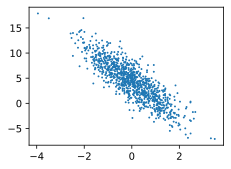

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

#
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    # 生成一个形状为 (num_examples, len(w)) 的张量 X，其中每个元素都从均值为0，标准差为1的正态分布中随机抽取。
    X = torch.normal(0, 1, (num_examples, len(w)))
    # 计算输入数据矩阵 X 和权重向量 w 的矩阵乘法
    y = torch.matmul(X, w) + b
    # 加上偏置误差
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

# 一维张量，长度为2
true_w = torch.tensor([2, -3.4])

true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);



In [ ]:
# 定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]